## Classifying text using BERT

This week we learn how to classify text into a specific category using Google's Bidirectional Encoder Representations from Transformers (BERT) language model. Besides text classification, BERT is also used in Google's search engine to better understand searches in English. 


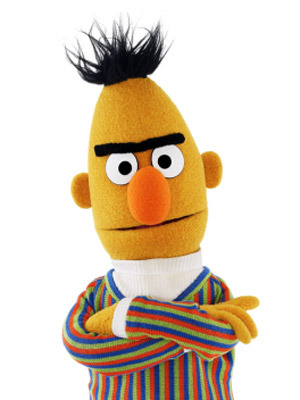

This week we also install a new package "ktrain", which uses keras as a baseline, but allows to create and train models with very few lines of code.

In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 981 kB 47.3 MB/s 
     |████████████████████████████████| 263 kB 46.2 MB/s 
     |████████████████████████████████| 2.8 MB 31.6 MB/s 
     |████████████████████████████████| 1.2 MB 42.1 MB/s 
     |████████████████████████████████| 468 kB 45.6 MB/s 
     |████████████████████████████████| 596 kB 43.6 MB/s 
     |████████████████████████████████| 895 kB 47.4 MB/s 
     |████████████████████████████████| 3.3 MB 30.4 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
  Created wheel for ktrain: filename=ktrain-0.30.0-py3-none-any.whl size=25309161 sha256=655c08b174a859b28cdd1746ba0acf23efca013a4c0b66c993291cdefacfa274
  Stored in directory: /root/.cache/pip/wheels/25/00/ae/80d1b19dd02bc2e6bc9bac32ba7dbaa59aad789e93274e4868
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=eccf372d7

As usual, we import the packages after training them.

In [2]:
import ktrain
from ktrain import text
import pandas as pd
from pandas import DataFrame

## Importing and preparing the data

We upload the dataset for training and validation. This time, a csv file with texts and their labels.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

*ktrain* is handy because it does a lot of things with a few lines of code. This part reads the data, transforms it into numbers using the BERT embeddings and the maximim sequence lenght, and seperates the training and validation datasets.

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv('imdb_data.csv',
                      label_columns = ["label"],
                      text_column = "text",
                      preprocess_mode='bert',
                      ngram_range=1,
                      val_pct=0.1,
                      val_filepath=None,
                      maxlen=64)

## Defining and training the model

Here we create a BERT based text classifier. The main parameter to be changed here is the batch size (how many texts will the algorithm read at once).

In [ ]:
learner = ktrain.get_learner(text.text_classifier('bert', (x_train, y_train), preproc=preproc, metrics = ['accuracy']),
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=64)

This step trains the model. You already know what epochs mean, but what about the other parameters? This documentation may be handy: https://amaiya.github.io/ktrain/core.html#ktrain.core.Learner.autofit

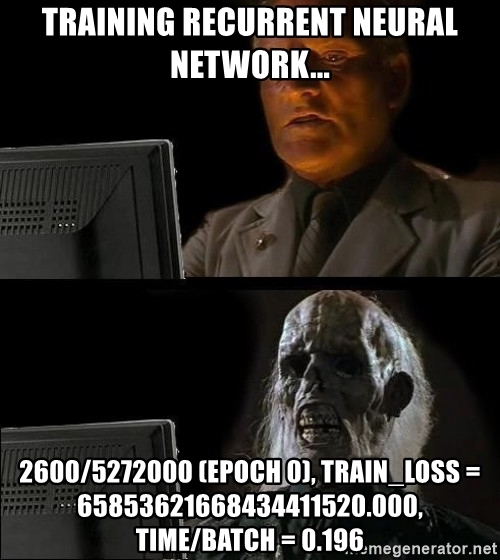

In [ ]:
learner.autofit(lr = 2e-5, early_stopping=3, reduce_on_plateau=2, epochs=10)

This gives you some additional information on where the classifier performed well (or not).

In [ ]:
learner.validate(val_data=(x_test, y_test))

## Making predictions

The final blocks of code allow you to input text and see what the predicted label is.

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
prediction = predictor.predict("The movie is terrible!")
print(prediction)